In [ ]:
# TODO: Cross-validation
# TODO: Model evaluation

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Dell\historical_weather.csv', encoding='utf-8')
print(df.head())

    name        date              time  avghumidity  avgtemp_c  cloud  \
0  Hanoi  2022-04-10  2022-04-10 00:00           67       24.3     21   
1  Hanoi  2022-04-10  2022-04-10 01:00           67       24.3     26   
2  Hanoi  2022-04-10  2022-04-10 02:00           67       24.3     31   
3  Hanoi  2022-04-10  2022-04-10 03:00           67       24.3     36   
4  Hanoi  2022-04-10  2022-04-10 04:00           67       24.3     33   

   condition_code                                    condition_icon  \
0            1000  //cdn.weatherapi.com/weather/64x64/night/113.png   
1            1003  //cdn.weatherapi.com/weather/64x64/night/116.png   
2            1003  //cdn.weatherapi.com/weather/64x64/night/116.png   
3            1003  //cdn.weatherapi.com/weather/64x64/night/116.png   
4            1003  //cdn.weatherapi.com/weather/64x64/night/116.png   

  condition_text  country  ...  pressure_mb  region  snow_cm  temp_c  \
0          Clear  Vietnam  ...         1012     NaN        0  

In [2]:
df.columns

Index(['name', 'date', 'time', 'avghumidity', 'avgtemp_c', 'cloud',
       'condition_code', 'condition_icon', 'condition_text', 'country',
       'daily_chance_of_rain', 'daily_chance_of_snow', 'daily_will_it_rain',
       'daily_will_it_snow', 'date_epoch', 'feelslike_c', 'hour_uv',
       'humidity', 'id', 'is_day', 'lat', 'localtime', 'localtime_epoch',
       'lon', 'maxtemp_c', 'maxwind_kph', 'mintemp_c', 'precip_in',
       'precip_mm', 'pressure_in', 'pressure_mb', 'region', 'snow_cm',
       'temp_c', 'totalprecip_mm', 'totalsnow_cm', 'tz_id', 'uv',
       'wind_degree', 'wind_kph'],
      dtype='object')

In [3]:
# Feature selection
features = df[["maxtemp_c", "mintemp_c", "avgtemp_c", "humidity", "wind_kph"]]
target = df["temp_c"]

In [4]:
features.head()

,maxtemp_c,mintemp_c,avgtemp_c,humidity,wind_kph
0,30.4,19.5,24.3,87,11.5
1,30.4,19.5,24.3,89,10.8
2,30.4,19.5,24.3,90,10.1
3,30.4,19.5,24.3,91,9.4
4,30.4,19.5,24.3,91,8.2


In [6]:
target.head()

0    20.5
1    20.3
2    20.2
3    20.0
4    19.8
Name: temp_c, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=0.8, test_size=0.2, random_state=0
)

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# fit data into model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = model.predict(X_test.head())

In [10]:
y_pred

array([27.454     , 26.7       , 30.384     , 24.29183333, 20.707     ])

In [11]:
pd.DataFrame({"Actual": y_test.head(), "Predicted": y_pred})

,Actual,Predicted
177856,29.4,27.454000
129033,26.7,26.700000
77840,26.2,30.384000
145506,24.9,24.291833
17770,22.4,20.707000


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions từ mô hình hồi quy
predictions = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

Mean Squared Error: 1.1184109309302523
Mean Absolute Error: 0.74883276427628
R-squared: 0.9505066462092695


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

# Table of contents:
1. [Feature engineering](#Feature-engineering)
2. [Cross-validation](#Cross-validation)

## Feature-engineering

In [5]:
data = df.copy()

In [6]:
data['hour'] = pd.to_datetime(data['time']).dt.hour
data['day_of_week'] = pd.to_datetime(data['date']).dt.dayofweek
data['month'] = pd.to_datetime(data['date']).dt.month

In [7]:
def assign_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

data['season'] = data['month'].apply(assign_season)


In [45]:
data.head(5)

,name,date,time,avghumidity,avgtemp_c,cloud,condition_code,condition_icon,condition_text,country,...,totalprecip_mm,totalsnow_cm,tz_id,uv,wind_degree,wind_kph,hour,day_of_week,month,season
0,Hanoi,2022-04-10,2022-04-10 00:00,67,24.3,21,1000,//cdn.weatherapi.com/weather/64x64/night/113.png,Clear,Vietnam,...,0.0,0,Asia/Bangkok,8,135,11.5,0,6,4,spring
1,Hanoi,2022-04-10,2022-04-10 01:00,67,24.3,26,1003,//cdn.weatherapi.com/weather/64x64/night/116.png,Partly cloudy,Vietnam,...,0.0,0,Asia/Bangkok,8,131,10.8,1,6,4,spring
2,Hanoi,2022-04-10,2022-04-10 02:00,67,24.3,31,1003,//cdn.weatherapi.com/weather/64x64/night/116.png,Partly cloudy,Vietnam,...,0.0,0,Asia/Bangkok,8,126,10.1,2,6,4,spring
3,Hanoi,2022-04-10,2022-04-10 03:00,67,24.3,36,1003,//cdn.weatherapi.com/weather/64x64/night/116.png,Partly cloudy,Vietnam,...,0.0,0,Asia/Bangkok,8,122,9.4,3,6,4,spring
4,Hanoi,2022-04-10,2022-04-10 04:00,67,24.3,33,1003,//cdn.weatherapi.com/weather/64x64/night/116.png,Partly cloudy,Vietnam,...,0.0,0,Asia/Bangkok,8,116,8.2,4,6,4,spring


In [8]:
data['temp_c_lag_1'] = data['temp_c'].shift(1) 
data['humidity_lag_1'] = data['humidity'].shift(1)
data['wind_kph_lag_1'] = data['wind_kph'].shift(1)
data['precip_in_lag_1'] = data['precip_in'].shift(1)
data['pressure_mb_lag_1'] = data['pressure_mb'].shift(1)
data.head(5)

,name,date,time,avghumidity,avgtemp_c,cloud,condition_code,condition_icon,condition_text,country,...,wind_kph,hour,day_of_week,month,season,temp_c_lag_1,humidity_lag_1,wind_kph_lag_1,precip_in_lag_1,pressure_mb_lag_1
0,Hanoi,2022-04-10,2022-04-10 00:00,67,24.3,21,1000,//cdn.weatherapi.com/weather/64x64/night/113.png,Clear,Vietnam,...,11.5,0,6,4,spring,NaN,NaN,NaN,NaN,NaN
1,Hanoi,2022-04-10,2022-04-10 01:00,67,24.3,26,1003,//cdn.weatherapi.com/weather/64x64/night/116.png,Partly cloudy,Vietnam,...,10.8,1,6,4,spring,20.5,87.0,11.5,0.0,1012.0
2,Hanoi,2022-04-10,2022-04-10 02:00,67,24.3,31,1003,//cdn.weatherapi.com/weather/64x64/night/116.png,Partly cloudy,Vietnam,...,10.1,2,6,4,spring,20.3,89.0,10.8,0.0,1012.0
3,Hanoi,2022-04-10,2022-04-10 03:00,67,24.3,36,1003,//cdn.weatherapi.com/weather/64x64/night/116.png,Partly cloudy,Vietnam,...,9.4,3,6,4,spring,20.2,90.0,10.1,0.0,1012.0
4,Hanoi,2022-04-10,2022-04-10 04:00,67,24.3,33,1003,//cdn.weatherapi.com/weather/64x64/night/116.png,Partly cloudy,Vietnam,...,8.2,4,6,4,spring,20.0,91.0,9.4,0.0,1011.0


In [9]:
data.bfill(inplace=True)

In [61]:
features = data[['maxtemp_c', 'mintemp_c', 'avgtemp_c', 'humidity', 'wind_kph',
                 'hour', 'day_of_week', 'month', 'season',  # BY TIME series
                 'temp_c_lag_1',
                 'humidity_lag_1', 'wind_kph_lag_1', 'precip_in_lag_1', 'pressure_mb_lag_1',
                 'lat', 'lon']]                            # BY Geographical 

In [56]:
features.head()

,maxtemp_c,mintemp_c,avgtemp_c,humidity,wind_kph,hour,day_of_week,month,season,temp_c_lag_1,humidity_lag_1,wind_kph_lag_1,precip_in_lag_1,pressure_mb_lag_1,lat,lon
0,30.4,19.5,24.3,87,11.5,0,6,4,spring,20.5,87.0,11.5,0.0,1012.0,21.03,105.85
1,30.4,19.5,24.3,89,10.8,1,6,4,spring,20.5,87.0,11.5,0.0,1012.0,21.03,105.85
2,30.4,19.5,24.3,90,10.1,2,6,4,spring,20.3,89.0,10.8,0.0,1012.0,21.03,105.85
3,30.4,19.5,24.3,91,9.4,3,6,4,spring,20.2,90.0,10.1,0.0,1012.0,21.03,105.85
4,30.4,19.5,24.3,91,8.2,4,6,4,spring,20.0,91.0,9.4,0.0,1011.0,21.03,105.85


## Cross-validation

In [70]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [71]:
categorical_columns = ['season', 'day_of_week']  # Add any other categorical features her
numerical_columns = [
    'maxtemp_c', 'mintemp_c', 'avgtemp_c', 'humidity', 'wind_kph', 'hour',
    'temp_c_lag_1', 'humidity_lag_1', 'wind_kph_lag_1', 'precip_in_lag_1', 'pressure_mb_lag_1',
    'lat', 'lon'
]

targets = data[['temp_c', 'humidity', 'wind_kph']]

# Define feature columns (input data)
features = data[numerical_columns + categorical_columns]

# Preprocess data with OneHotEncoder for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [72]:
models = {
    "RandomForest": RandomForestRegressor(),
    "LinearRegression": LinearRegression(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100)
}

# Custom scorer for mean_squared_error because it supports multiple outputs
def cross_validate_models(models, X_train, y_train):
    for name, model in models.items():
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', MultiOutputRegressor(model))
        ])

        # Perform 5-fold cross-validation
        scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

        print(f"{name} - Mean MSE: {-scores.mean()}, Std: {scores.std()}")
        
cross_validate_models(models, X_train, y_train)


RandomForest - Mean MSE: 0.0520840104938356, Std: 0.0006954172204020711
LinearRegression - Mean MSE: 0.33560792266571976, Std: 0.006262549005200236
XGBoost - Mean MSE: 0.06350838810447461, Std: 0.0026478372270191263


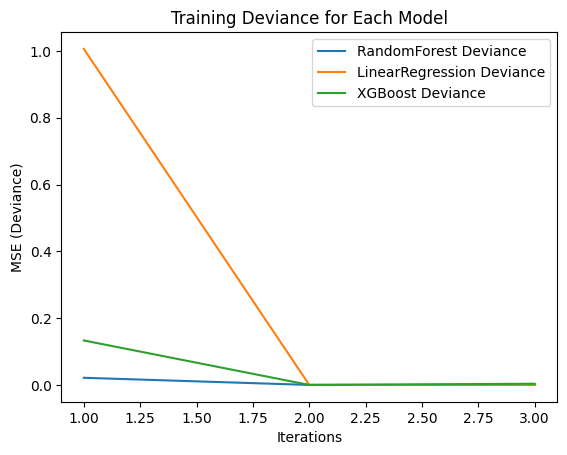

In [73]:
def plot_training_deviance(X_train, y_train, models):
    for name, model in models.items():
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', MultiOutputRegressor(model))
        ])

        # Fit model and track deviance (training loss)
        model_fit = pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_train)
        mse = mean_squared_error(y_train, y_pred, multioutput='raw_values')  # Individual MSEs for each target
        
        # Plot training deviance
        plt.plot(np.arange(1, len(mse) + 1), mse, label=f'{name} Deviance')

    plt.title("Training Deviance for Each Model")
    plt.xlabel("Iterations")
    plt.ylabel("MSE (Deviance)")
    plt.legend()
    plt.show()

plot_training_deviance(X_train, y_train, models)

## Model evaluation

In [88]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numerical columns
categorical_columns = ['season', 'day_of_week']  # Add any other categorical features here
numerical_columns = [
    'maxtemp_c', 'mintemp_c', 'avgtemp_c', 'humidity', 'wind_kph', 'hour',
    'temp_c_lag_1', 'humidity_lag_1', 'wind_kph_lag_1', 'precip_in_lag_1', 'pressure_mb_lag_1',
    'lat', 'lon'
]

# Target variables
targets = data[['temp_c', 'humidity', 'wind_kph']]

# Define features
features = data[numerical_columns + categorical_columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Define the transformer for one-hot encoding the categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),  # Pass through numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical columns
    ])

# Create a pipeline with preprocessor and RandomForestRegressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Save the trained model to disk
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)


Mean Squared Error (MSE): 0.17559483032399834
Mean Absolute Error (MAE): 0.2027739410048457
R-squared: 0.992546747372895


RandomForest Model Evaluation:
  Mean Squared Error (MSE): 0.050598165979334746
  Mean Absolute Error (MAE): 0.08560424030939401
  R-squared: 0.9977276994799076

LinearRegression Model Evaluation:
  Mean Squared Error (MSE): 0.3243993799894797
  Mean Absolute Error (MAE): 0.21850373121930103
  R-squared: 0.9854313415209189

XGBoost Model Evaluation:
  Mean Squared Error (MSE): 0.059649941674096346
  Mean Absolute Error (MAE): 0.09647937448247183
  R-squared: 0.9972657561302185



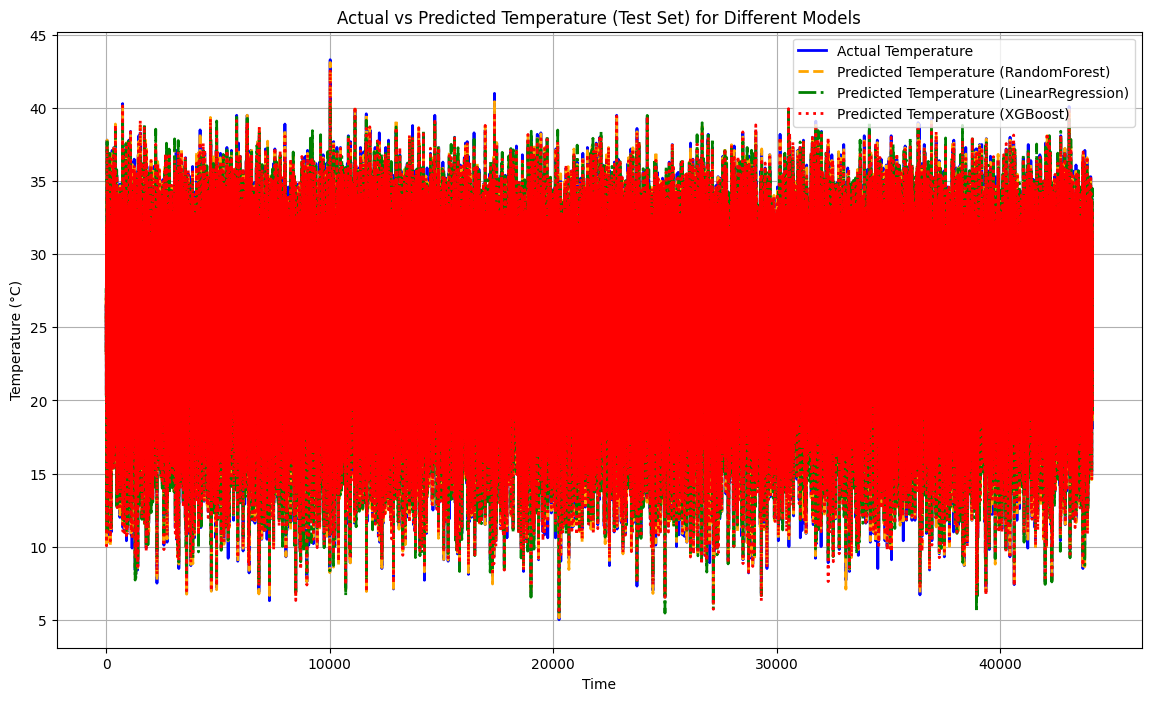

In [15]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Assuming your data is already loaded into a DataFrame called 'data'

# Define categorical and numerical columns
categorical_columns = ['season', 'day_of_week']
numerical_columns = [
    'maxtemp_c', 'mintemp_c', 'avgtemp_c', 'humidity', 'wind_kph', 'hour',
    'temp_c_lag_1', 'humidity_lag_1', 'wind_kph_lag_1', 'precip_in_lag_1', 'pressure_mb_lag_1',
    'lat', 'lon'
]

# Target variables
targets = data[['temp_c', 'humidity', 'wind_kph']]

# Define features
features = data[numerical_columns + categorical_columns]

# Preprocessing: OneHotEncode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "RandomForest": RandomForestRegressor(),
    "LinearRegression": LinearRegression(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100)
}

# Initialize an empty dictionary to store predictions
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    # Create pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', MultiOutputRegressor(model))
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict the target values for the test set
    y_pred = pipeline.predict(X_test)
    
    # Save predictions for later visualization
    predictions[name] = y_pred
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"{name} Model Evaluation:")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  R-squared: {r2}\n")

# Visualization of actual vs predicted temperature for each model
actual_temp_c = y_test['temp_c'].values
time_index = np.arange(len(actual_temp_c))

plt.figure(figsize=(14, 8))

# Plot actual values
plt.plot(time_index, actual_temp_c, color='blue', label='Actual Temperature', linewidth=2)

# Plot predicted values for each model
colors = ['orange', 'green', 'red']
linestyles = ['--', '-.', ':']

for (name, y_pred), color, linestyle in zip(predictions.items(), colors, linestyles):
    predicted_temp_c = y_pred[:, 0]  # Assuming the first column corresponds to 'temp_c'
    plt.plot(time_index, predicted_temp_c, color=color, linestyle=linestyle, label=f'Predicted Temperature ({name})', linewidth=2)

# Plot details
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperature (Test Set) for Different Models')
plt.legend()
plt.grid(visible=True)
plt.show()


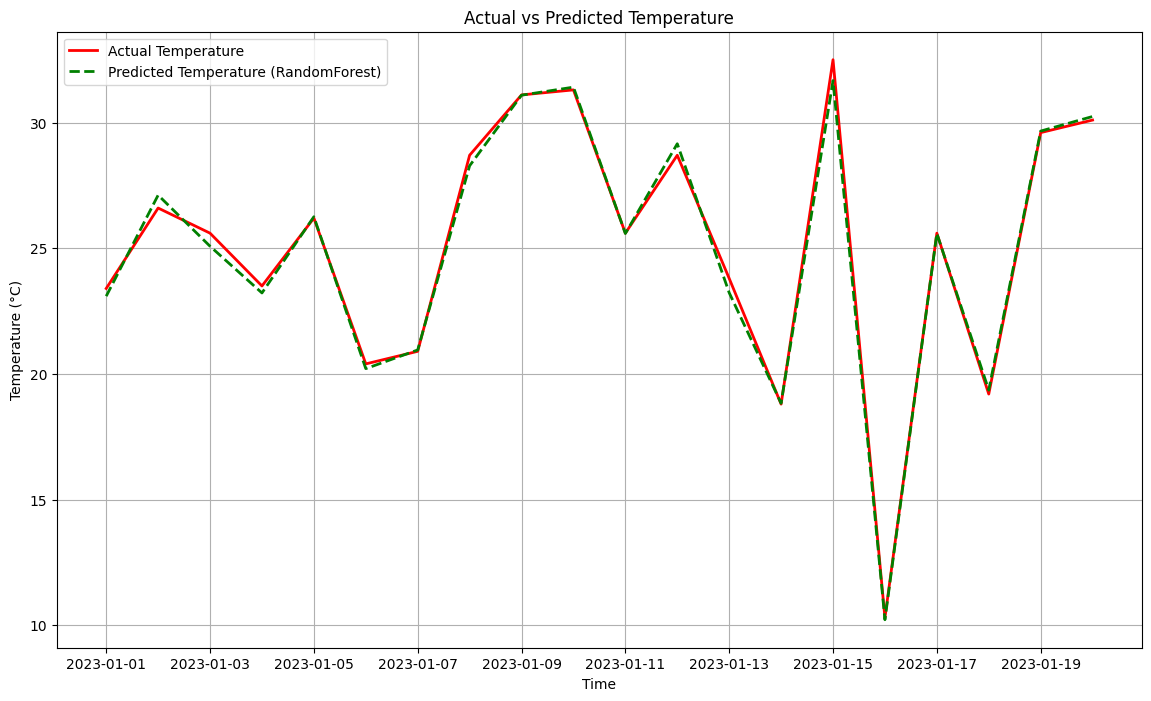

In [33]:
'''
    RandomForest Model Evaluation:
      Mean Squared Error (MSE): 0.050598165979334746
      Mean Absolute Error (MAE): 0.08560424030939401
      R-squared: 0.9977276994799076
    
    LinearRegression Model Evaluation:
      Mean Squared Error (MSE): 0.3243993799894797
      Mean Absolute Error (MAE): 0.21850373121930103
      R-squared: 0.9854313415209189
    
    XGBoost Model Evaluation:
      Mean Squared Error (MSE): 0.059649941674096346
      Mean Absolute Error (MAE): 0.09647937448247183
      R-squared: 0.9972657561302185
'''
# Define the number of points to visualize
subset_points = 20

# Visualization of actual vs predicted temperature for Random Forest (subset)
plt.figure(figsize=(14, 8))

# Plot a subset of actual and predicted values
plt.plot(time_index[:subset_points], actual_temp_c[:subset_points], color='red', label='Actual Temperature', linewidth=2)
plt.plot(time_index[:subset_points], predicted_temp_c[:subset_points], color='green', linestyle='--', label='Predicted Temperature (RandomForest)', linewidth=2)

# Plot details
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.grid(visible=True)
plt.show()
